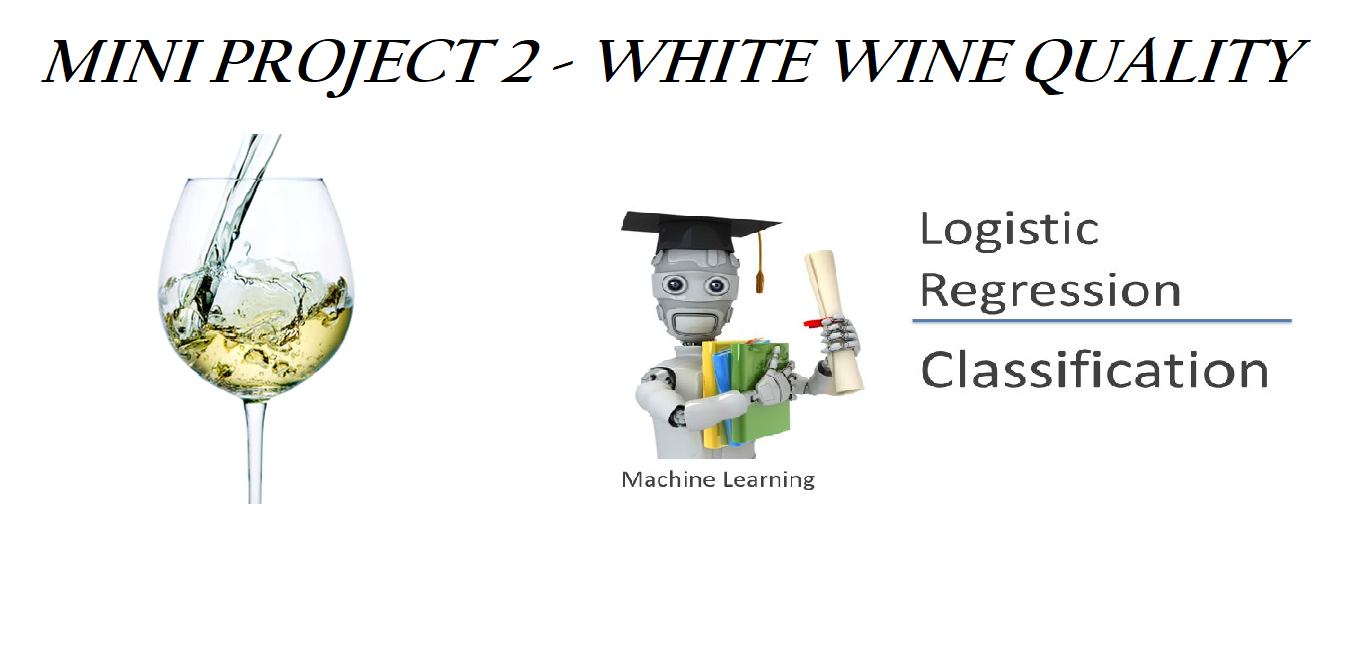

# Importing Libraries

In [1]:
from IPython.display import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns


In [2]:
wine = pd.read_csv('winequality-white.csv' , delimiter=';')

# EDA

In [3]:
wine.shape

(4898, 12)

In [4]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
# As this is teh CSV files which does separates the comma but there were semi colons which did not seperate the columns so I used
# Delimiter to remove the semi colons, to make the file more tidy and clear

In [6]:
wine.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [7]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [8]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

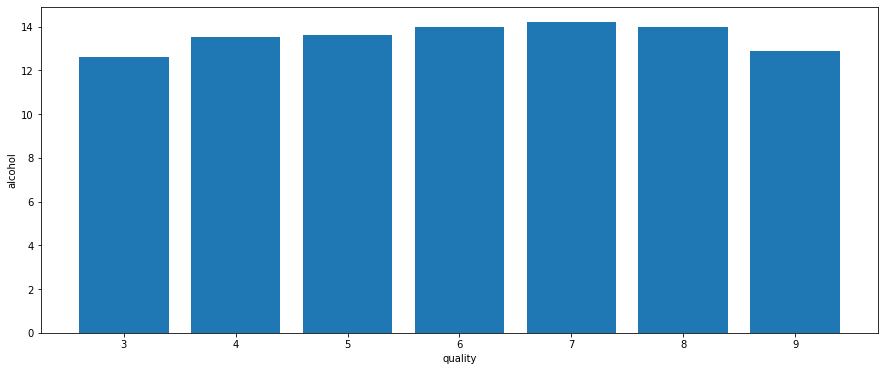

In [21]:
plt.figure(figsize=[15,6])
plt.bar(wine['quality'],wine['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

# Visualization

In [9]:
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


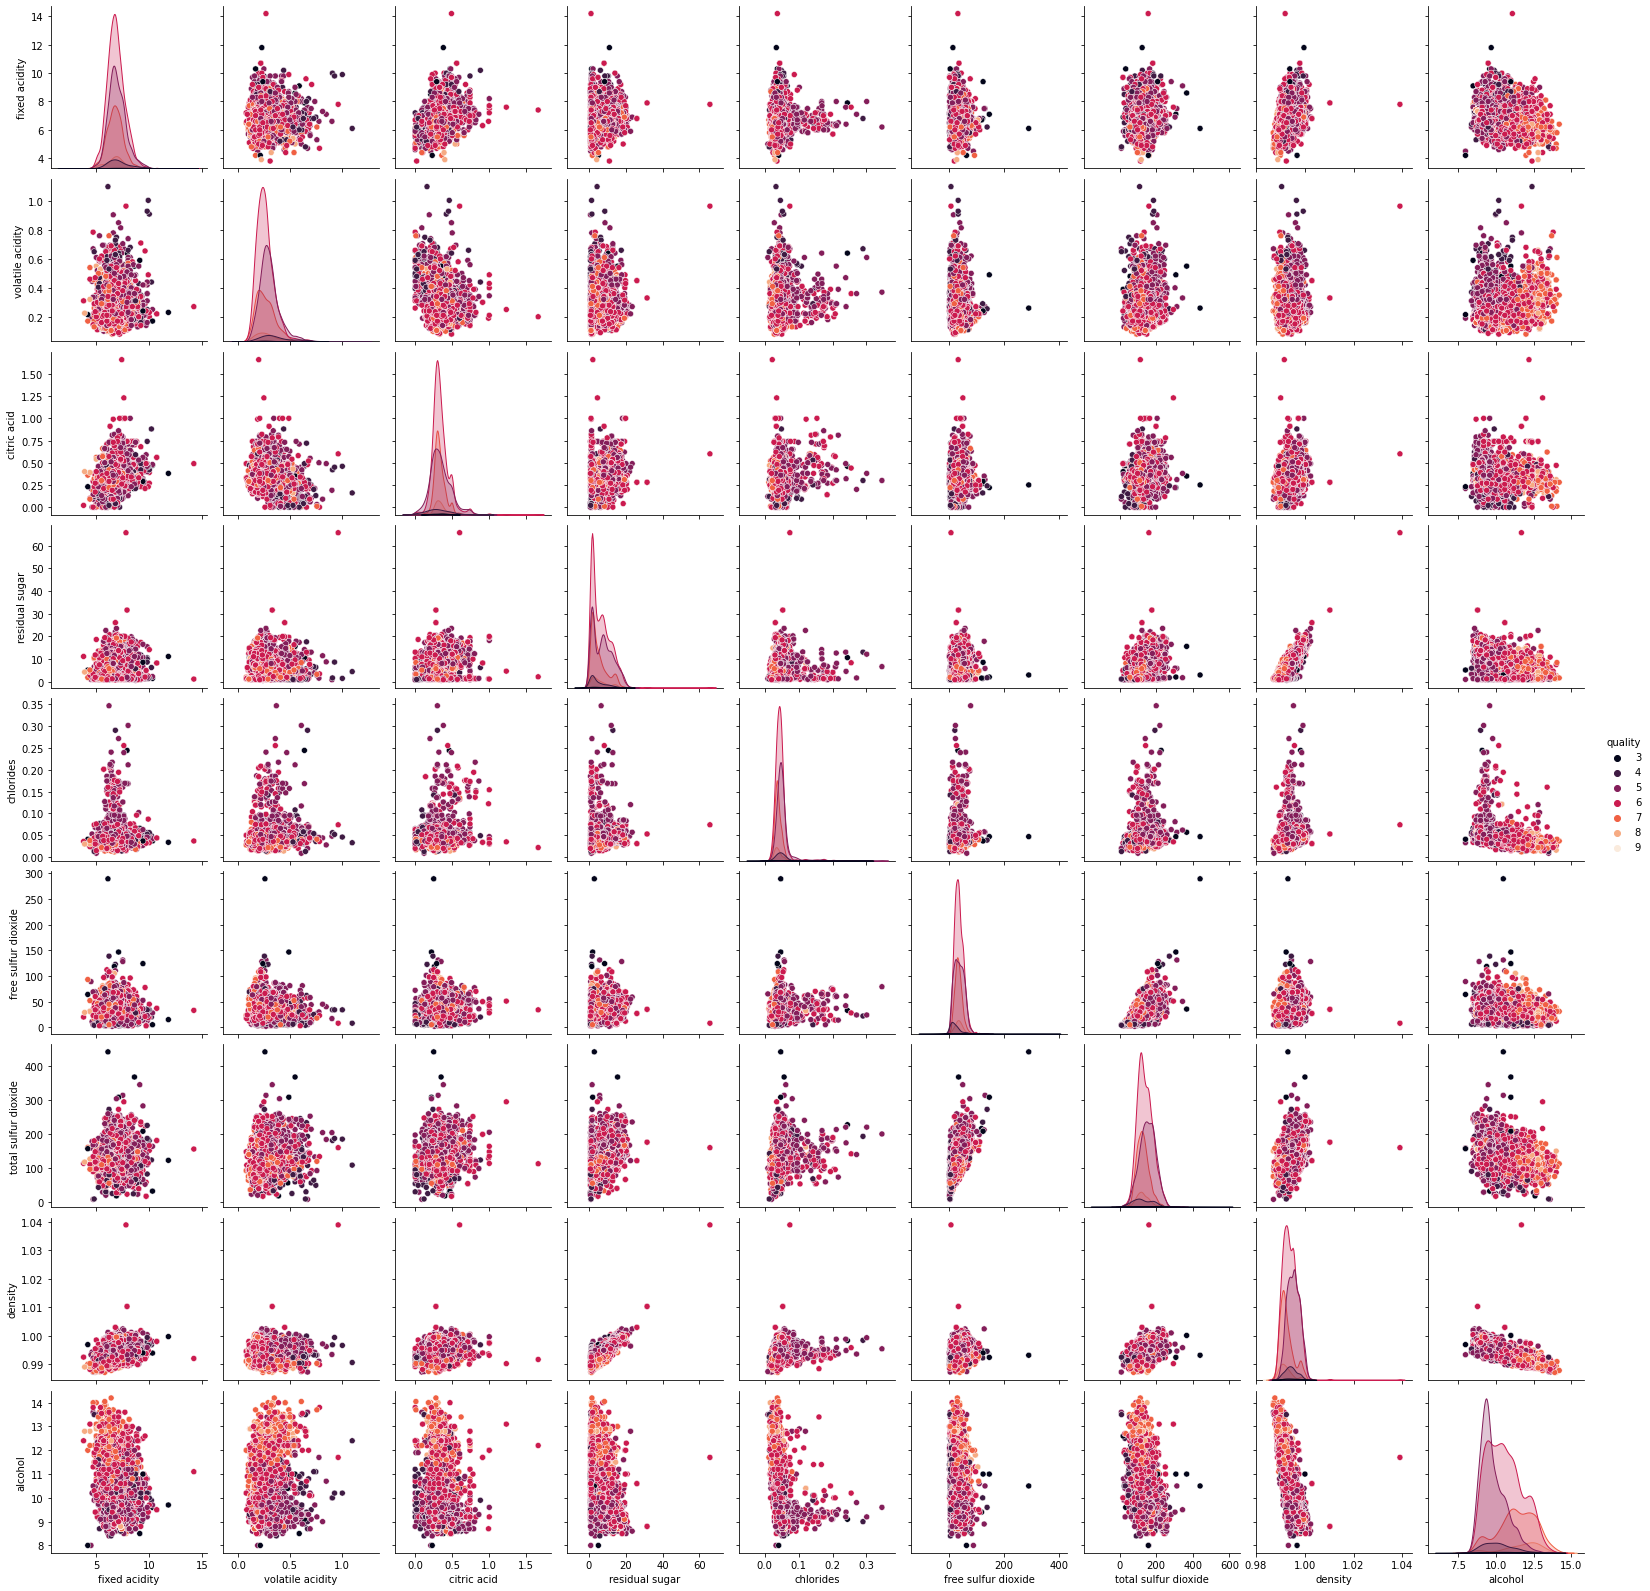

In [115]:
cols = ['fixed acidity',
        'volatile acidity', 
        'citric acid', 
        'residual sugar', 
        'chlorides', 
        'free sulfur dioxide', 
        'total sulfur dioxide', 
        'density',
        'alcohol', 
        'quality']

sns.pairplot(data=wine[cols], hue='quality', palette='rocket')

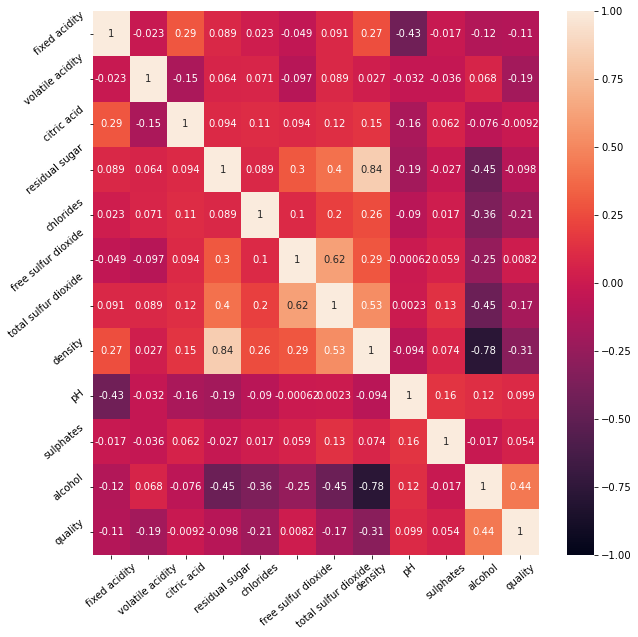

In [10]:
corr = wine.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, vmin=-1.0, vmax=1.0)
plt.xticks(rotation=40)
plt.yticks(rotation=40)
plt.show()

In [11]:
y = wine['quality']
X = wine[['alcohol', 'density', 'volatile acidity']]
X

,alcohol,density,volatile acidity
0,8.8,1.00100,0.27
1,9.5,0.99400,0.30
2,10.1,0.99510,0.28
3,9.9,0.99560,0.23
4,9.9,0.99560,0.23
...,...,...,...
4893,11.2,0.99114,0.21
4894,9.6,0.99490,0.32
4895,9.4,0.99254,0.24
4896,12.8,0.98869,0.29


### 4. Using Linear Regression Create a Model and Test Score

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=80)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [14]:
X_train

,alcohol,density,volatile acidity
4665,12.4,0.99272,0.17
1943,9.5,0.99680,0.25
3399,11.1,0.99268,0.32
843,10.8,0.99315,0.19
2580,10.4,0.99976,0.30
...,...,...,...
4426,9.9,0.99418,0.21
466,9.4,0.99560,0.14
3092,11.4,0.99129,0.27
3772,10.6,0.99567,0.24


In [15]:
# Create a model for Linear Regression
lr_model = LinearRegression()

# Fit the model with the Training data
lr_model.fit(X_train, y_train)

# Calculate the score (R^2 for Regression) for Training Data
lr_model.score(X_train, y_train)

# Calculate the score (R^2 for Regression) for Testing Data
lr_model.score(X_test, y_test)

#make a prediction
alcohol = 10
density = 0.99
volatile_acid = 0.3

lr_model.predict([[20,0.99,0.3 ]])

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([9.45233174])

In [16]:
# Find coefficients
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train)
lr.score(X_test, y_test)

lr_coef_df = pd.DataFrame({'feature': X.columns, 'coefficient': lr.coef_})
lr_coef_df

,feature,coefficient
0,alcohol,0.399085
1,density,40.001725
2,volatile acidity,-2.128325


In [77]:
print(lr.score(X_train, y_train))

0.5224604389994896


In [78]:
print(lr.score(X_test, y_test))

0.5102040816326531


### 4. Using Linear Regression Create a Model and Test Score

In [17]:
# Cross validation 
from sklearn.model_selection import KFold 
from sklearn.metrics import mean_squared_error

In [10]:
## Load the wine quality dataset

# Load the wine dataset from csv
#wine = pd.read_csv('../../DATA/winequality_merged.csv')

# define the target variable (dependent variable) as y
y = wine['quality']

# Take all columns except target as predictor columns
predictor_columns = [c for c in wine.columns if c != 'quality']
# Load the dataset as a pandas data frame
X = pd.DataFrame(wine, columns = predictor_columns)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [18]:
# Set up 5-fold cross validation  
k_fold = KFold(5, shuffle=True)
train_scores = []
train_rmse = []
test_scores = []
test_rmse = []

for k, (train, test) in enumerate(k_fold.split(X)):
    
    # Get training and test sets for X and y
    X_train = X.iloc[train, ]
    y_train = y.iloc[train, ]
    X_test = X.iloc[test, ]
    y_test = y.iloc[test, ]
    
        # Fit model with training set
    lr.fit(X_train, y_train)
    
        # Make predictions with training and test set
    train_preds = lr.predict(X_train)
    test_preds = lr.predict(X_test)
    
   
    # Score R2 and RMSE on training and test sets and store in list
    
    train_scores.append(lr.score(X_train, y_train))
    test_scores.append(lr.score(X_test, y_test))
    
    train_rmse.append(mean_squared_error(y_train, train_preds, squared=False))
    test_rmse.append(mean_squared_error(y_test, test_preds, squared=False))
    
# Create a metrics_df dataframe to display r2 and rmse scores
metrics_df = pd.DataFrame({'Training R2': train_scores, 
                           'Test R2': test_scores, 
                           'Training RMSE': train_rmse, 
                           'Test RMSE': test_rmse},
                          index=[i+1 for i in range(5)])

metrics_df

,Training R2,Test R2,Training RMSE,Test RMSE
1,0.240277,0.270902,0.766725,0.775904
2,0.248490,0.239426,0.764400,0.785196
3,0.250535,0.232034,0.763848,0.786912
4,0.247453,0.243833,0.774205,0.745499
5,0.248442,0.238958,0.772789,0.751626


In [19]:
k_fold

KFold(n_splits=5, random_state=None, shuffle=True)

In [20]:
# Cross validation 
from sklearn.model_selection import KFold 
from sklearn.metrics import mean_squared_error

k_fold = KFold(5, shuffle=True)

k_fold.split(X)

<generator object _BaseKFold.split at 0x0000023536A81820>


#### Models and finding out the Best one¶

#### Logistic Regression

In [79]:
wine['dummy_quality'] = 0
wine.loc[wine['quality']>5, 'dummy_quality'] = 1


In [82]:
y = wine['dummy_quality']
X = wine[['alcohol', 'density', 'volatile acidity']]

In [81]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,dummy_quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=80)

In [84]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

model1=lr.fit(X_train,y_train)
prediction1=model1.predict(X_test)

In [85]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,prediction1)
cm

array([[159, 156],
       [ 95, 570]], dtype=int64)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


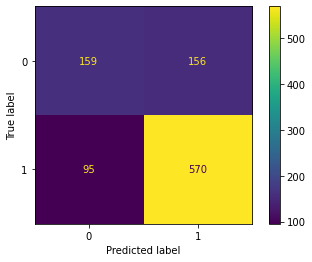

In [87]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(lr, X_test, y_test)  
plt.show()


In [88]:
from sklearn.metrics import accuracy_score

In [89]:
accuracy_score(y_test,prediction1)

0.7438775510204082

In [90]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier()
model2=dtc.fit(X_train,y_train)
prediction2=model2.predict(X_test)
cm2= confusion_matrix(y_test,prediction2)

In [91]:
cm2

array([[209, 106],
       [121, 544]], dtype=int64)

In [92]:
accuracy_score(y_test,prediction2)

0.7683673469387755

In [93]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()
model3 = rfc.fit(X_train, y_train)
prediction3 = model3.predict(X_test)
confusion_matrix(y_test, prediction3)

array([[207, 108],
       [ 76, 589]], dtype=int64)

In [94]:
accuracy_score(y_test, prediction3)

0.8122448979591836

In [95]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction3))

              precision    recall  f1-score   support

           0       0.73      0.66      0.69       315
           1       0.85      0.89      0.86       665

    accuracy                           0.81       980
   macro avg       0.79      0.77      0.78       980
weighted avg       0.81      0.81      0.81       980



In [96]:
print(classification_report(y_test, prediction1))

print(classification_report(y_test, prediction2))

              precision    recall  f1-score   support

           0       0.63      0.50      0.56       315
           1       0.79      0.86      0.82       665

    accuracy                           0.74       980
   macro avg       0.71      0.68      0.69       980
weighted avg       0.73      0.74      0.74       980

              precision    recall  f1-score   support

           0       0.63      0.66      0.65       315
           1       0.84      0.82      0.83       665

    accuracy                           0.77       980
   macro avg       0.74      0.74      0.74       980
weighted avg       0.77      0.77      0.77       980



#### K Nearest Neighbor (K NN)
#### Support Vector Machine
#### Naive Bayes

In [97]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [98]:
models=[]

models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))


In [99]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [100]:
# evaluate each model

results =[]
names=[]
for name , model in models:
    kfold=KFold(n_splits=10, random_state=None)
    cv_results= cross_val_score(model, X_train, y_train, cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    
    msg= '%s:, %f, (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNN:, 0.729966, (0.021353)
NB:, 0.697289, (0.015839)
SVM:, 0.702667, (0.023211)


In [101]:
SVM = SVC()
SVM.fit(X_train, y_train)
predictions= SVM.predict(X_test)
print(accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

0.7214285714285714
              precision    recall  f1-score   support

           0       0.59      0.45      0.51       315
           1       0.76      0.85      0.81       665

    accuracy                           0.72       980
   macro avg       0.68      0.65      0.66       980
weighted avg       0.71      0.72      0.71       980

[[141 174]
 [ 99 566]]


#### Ridge Regression

In [104]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
parameters={"alpha": [-1, 0, 0.5, 1]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring="neg_mean_squared_error", cv=5)
ridge_regressor.fit(X, y)

print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_) 

{'alpha': 0}
-0.17624497423213664


In [108]:
log_regression = LogisticRegression()

#fit the model using the training data
log_regression.fit(X_train,y_train)

LogisticRegression()

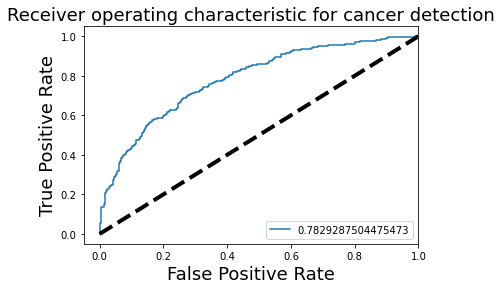

In [112]:
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
import matplotlib.pyplot as plt
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
roc_auc = auc(fpr, tpr)

#create ROC curve
plt.plot(fpr, tpr, label= roc_auc)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for cancer detection', fontsize=18)
plt.legend(loc="lower right")
plt.show()

#### Appendices

### 5. Forward Feature Selection

> Forward Selection: Forward selection is an iterative method in which we start with having no feature in the model. In each iteration, we keep adding the feature which best improves our model till an addition of a new variable does not improve the performance of the model.

Create a Regression model using Forward Feature Selection by looping over all the features adding one at a time until there are no improvements on the prediction metric ( R2  and  AdjustedR2  in this case).

In [13]:
show_steps = True

In [14]:
## Use Forward Feature Selection to pick a good model

# start with no predictors
included = []
# keep track of model and parameters
best = {'feature': '', 'r2': 0, 'a_r2': 0}
# create a model object to hold the modelling parameters
model = LinearRegression() # create a model for Linear Regression
# get the number of cases in the training data
n = X_train.shape[0]

while True:
    changed = False
    
    if show_steps:
        print('') 

    # list the features to be evaluated
    excluded = list(set(X.columns) - set(included))
    
    if show_steps:
        print('(Step) Excluded = %s' % ', '.join(excluded))  

    # for each remaining feature to be evaluated
    for new_column in excluded:
        
        if show_steps:
            print('(Step) Trying %s...' % new_column)
            print('(Step) - Features = %s' % ', '.join(included + [new_column]))

        # fit the model with the Training data
        fit = model.fit(X_train[included + [new_column]], y_train) # fit a model; consider which predictors should be included
        # calculate the score (R^2 for Regression)
        r2 = fit.score(X_train[included + [new_column]], y_train) # calculate the score
        # number of predictors in this model
        k = len(included) + 1
        # calculate the adjusted R^2
        adjusted_r2 = 1 - ( ( (1 - r2) * (n - 1) ) / (n - k - 1) ) # calculate the Adjusted R^2

        if show_steps:
            print('(Step) - Adjusted R^2: This = %.3f; Best = %.3f' % 
                  (adjusted_r2, best['a_r2']))

        # if model improves
        if adjusted_r2 > best['a_r2']:
            # record new parameters
            best = {'feature': new_column, 'r2': r2, 'a_r2': adjusted_r2}
            # flag that found a better model
            changed = True
            if show_steps:
                print('(Step) - New Best!   : Feature = %s; R^2 = %.3f; Adjusted R^2 = %.3f' % 
                      (best['feature'], best['r2'], best['a_r2']))
    # END for

    # if found a better model after testing all remaining features
    if changed:
        # update control details
        included.append(best['feature'])
        excluded = list(set(excluded) - set(best['feature']))
        print('Added feature %-4s with R^2 = %.3f and adjusted R^2 = %.3f' % 
              (best['feature'], best['r2'], best['a_r2']))
    else:
        # terminate if no better model
        break

print('')
print('Resulting features:')
print(', '.join(included))


(Step) Excluded = chlorides, alcohol, residual sugar, pH, free sulfur dioxide, sulphates, density, total sulfur dioxide, volatile acidity, fixed acidity, citric acid
(Step) Trying chlorides...
(Step) - Features = chlorides
(Step) - Adjusted R^2: This = 0.046; Best = 0.000
(Step) - New Best!   : Feature = chlorides; R^2 = 0.047; Adjusted R^2 = 0.046
(Step) Trying alcohol...
(Step) - Features = alcohol
(Step) - Adjusted R^2: This = 0.195; Best = 0.046
(Step) - New Best!   : Feature = alcohol; R^2 = 0.195; Adjusted R^2 = 0.195
(Step) Trying residual sugar...
(Step) - Features = residual sugar
(Step) - Adjusted R^2: This = 0.010; Best = 0.195
(Step) Trying pH...
(Step) - Features = pH
(Step) - Adjusted R^2: This = 0.011; Best = 0.195
(Step) Trying free sulfur dioxide...
(Step) - Features = free sulfur dioxide
(Step) - Adjusted R^2: This = -0.000; Best = 0.195
(Step) Trying sulphates...
(Step) - Features = sulphates
(Step) - Adjusted R^2: This = 0.004; Best = 0.195
(Step) Trying density...

(Step) - Adjusted R^2: This = 0.270; Best = 0.270
(Step) - New Best!   : Feature = chlorides; R^2 = 0.271; Adjusted R^2 = 0.270
(Step) Trying pH...
(Step) - Features = alcohol, volatile acidity, residual sugar, fixed acidity, sulphates, pH
(Step) - Adjusted R^2: This = 0.270; Best = 0.270
(Step) Trying free sulfur dioxide...
(Step) - Features = alcohol, volatile acidity, residual sugar, fixed acidity, sulphates, free sulfur dioxide
(Step) - Adjusted R^2: This = 0.273; Best = 0.270
(Step) - New Best!   : Feature = free sulfur dioxide; R^2 = 0.274; Adjusted R^2 = 0.273
(Step) Trying density...
(Step) - Features = alcohol, volatile acidity, residual sugar, fixed acidity, sulphates, density
(Step) - Adjusted R^2: This = 0.273; Best = 0.273
(Step) - New Best!   : Feature = density; R^2 = 0.275; Adjusted R^2 = 0.273
(Step) Trying total sulfur dioxide...
(Step) - Features = alcohol, volatile acidity, residual sugar, fixed acidity, sulphates, total sulfur dioxide
(Step) - Adjusted R^2: This = 

####  Explain in your own words what is cross validation and Regularisation and why we are using it. Did it improve the model?

In [ ]:
Cross-Validation is a statistical method of evaluating and comparing learning algorithms by dividing data into two segments: 
one used to learn or train a model and the other used to validate the model

In [ ]:
Regularization refers to techniques that are used to calibrate machine learning models in order to minimize the adjusted loss function 
and prevent overfitting or underfitting

In [ ]:
Cross validation is about choosing the "best" model, where "best" is defined in terms of test set performance. 

Regularization is about simplifying the model. They could, but do not have to, result in similar solutions.

####  Explain the difference between Logistic regression and Linear regression. How are they different?

In [ ]:
Linear Regression:                                                          

1. Linear regression is used to predict the continuous dependent variable using a given set of independent variables.
2. Linear Regression is used for solving Regression problem.
3. In Linear regression, we predict the value of continuous variables.
4. In linear regression, we find the best fit line, by which we can easily predict the output.
5. Least square estimation method is used for estimation of accuracy.
6. The output for Linear Regression must be a continuous value, such as price, age, etc.
7. In Linear regression, it is required that relationship between dependent variable and independent variable must be linear.
8. In linear regression, there may be collinearity between the independent variables.




Logistic Regression:

    
1. Logistic Regression is used to predict the categorical dependent variable using a given set of independent variables.
2. Logistic regression is used for solving Classification problems.
3. In logistic Regression, we predict the values of categorical variables.
4. In Logistic Regression, we find the S-curve by which we can classify the samples.
5. Maximum likelihood estimation method is used for estimation of accuracy.
6. The output of Logistic Regression must be a Categorical value such as 0 or 1, Yes or No, etc.
7. In Logistic regression, it is not required to have the linear relationship between the dependent and independent variable.
8. In logistic regression, there should not be collinearity between the independent variable.



#### Which is the best overall model? How can the model be improved further? 

In [ ]:
The best accuracy with Random Forest Classifier which is 81.2% , the model is predicting with 81% accuracy on our test data
